In [194]:
from top2vec import Top2Vec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('ESGnie_target_descriptions.csv')

In [370]:
data.head()

,company_name,target_explanation_english
0,3M Company,"3M, as a science-based company, supports the p..."
1,3i Group,In 2017 we set a target to reduce our global g...
2,A2A,This target will be mainly achieved thanks to ...
3,ABB,"In 2017, we refined the 2020 measures and targ..."
4,ACCIONA S.A.,ACCIONA is a carbon neutral company since 2016...


In [86]:
docs = list(set(data['target_explanation_english'].tolist()))

In [87]:
len(docs)

6712

In [7]:
docs[0]

'3M, as a science-based company, supports the proactive approach of science-based GHG emission reduction targets.  We have a long record of being proactive on the matter of climate change, as demonstrated by our 68.1 percent absolute reduction in GHG emissions from our operations through 2017, from a 2002 baseline. This ambitious reduction currently aligns with the concept of science-based goal setting, in that it far exceeds the reductions called for to date in the Inter-governmental Panel on Climate Change (IPCC) Fourth Assessment Report (AR4).  Building on that tradition, our 2025 GHG emissions goals aims to ensure that GHG emissions are at least 50 percent below our 2002 baseline while still growing our business.  3M has begun work to understand and evaluate methodologies for setting a science-based GHG emission target. One challenge is the current gap in availability of a certified or reference reduction scheme for all entities. More specifically, we have evaluated the currently a

In [88]:
model = Top2Vec(docs, speed='learn')

2022-06-08 12:52:17,194 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
2022-06-08 12:52:18,933 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2022-06-08 12:52:43,012 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2022-06-08 12:52:49,734 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2022-06-08 12:52:50,081 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [89]:
model.get_num_topics()

75

In [568]:
model.save('ESGnie_emissions_model_V1')

In [102]:
model.hierarchical_topic_reduction(num_topics=25)

[[36, 41, 66, 0],
 [22, 54, 45, 72, 38, 57, 4],
 [35, 3],
 [62, 58, 61, 68, 1],
 [2],
 [33, 34, 42, 51, 59, 60, 7],
 [37, 40, 46, 8],
 [5],
 [44, 30, 47, 71, 16],
 [32, 9],
 [50, 56, 12],
 [63, 21, 43, 65, 20],
 [39, 6],
 [28, 70, 15],
 [73, 26, 17],
 [31, 13],
 [29, 52, 24],
 [49, 69, 10],
 [74, 19],
 [67, 11],
 [18],
 [53, 14],
 [48, 25],
 [55, 23],
 [64, 27]]

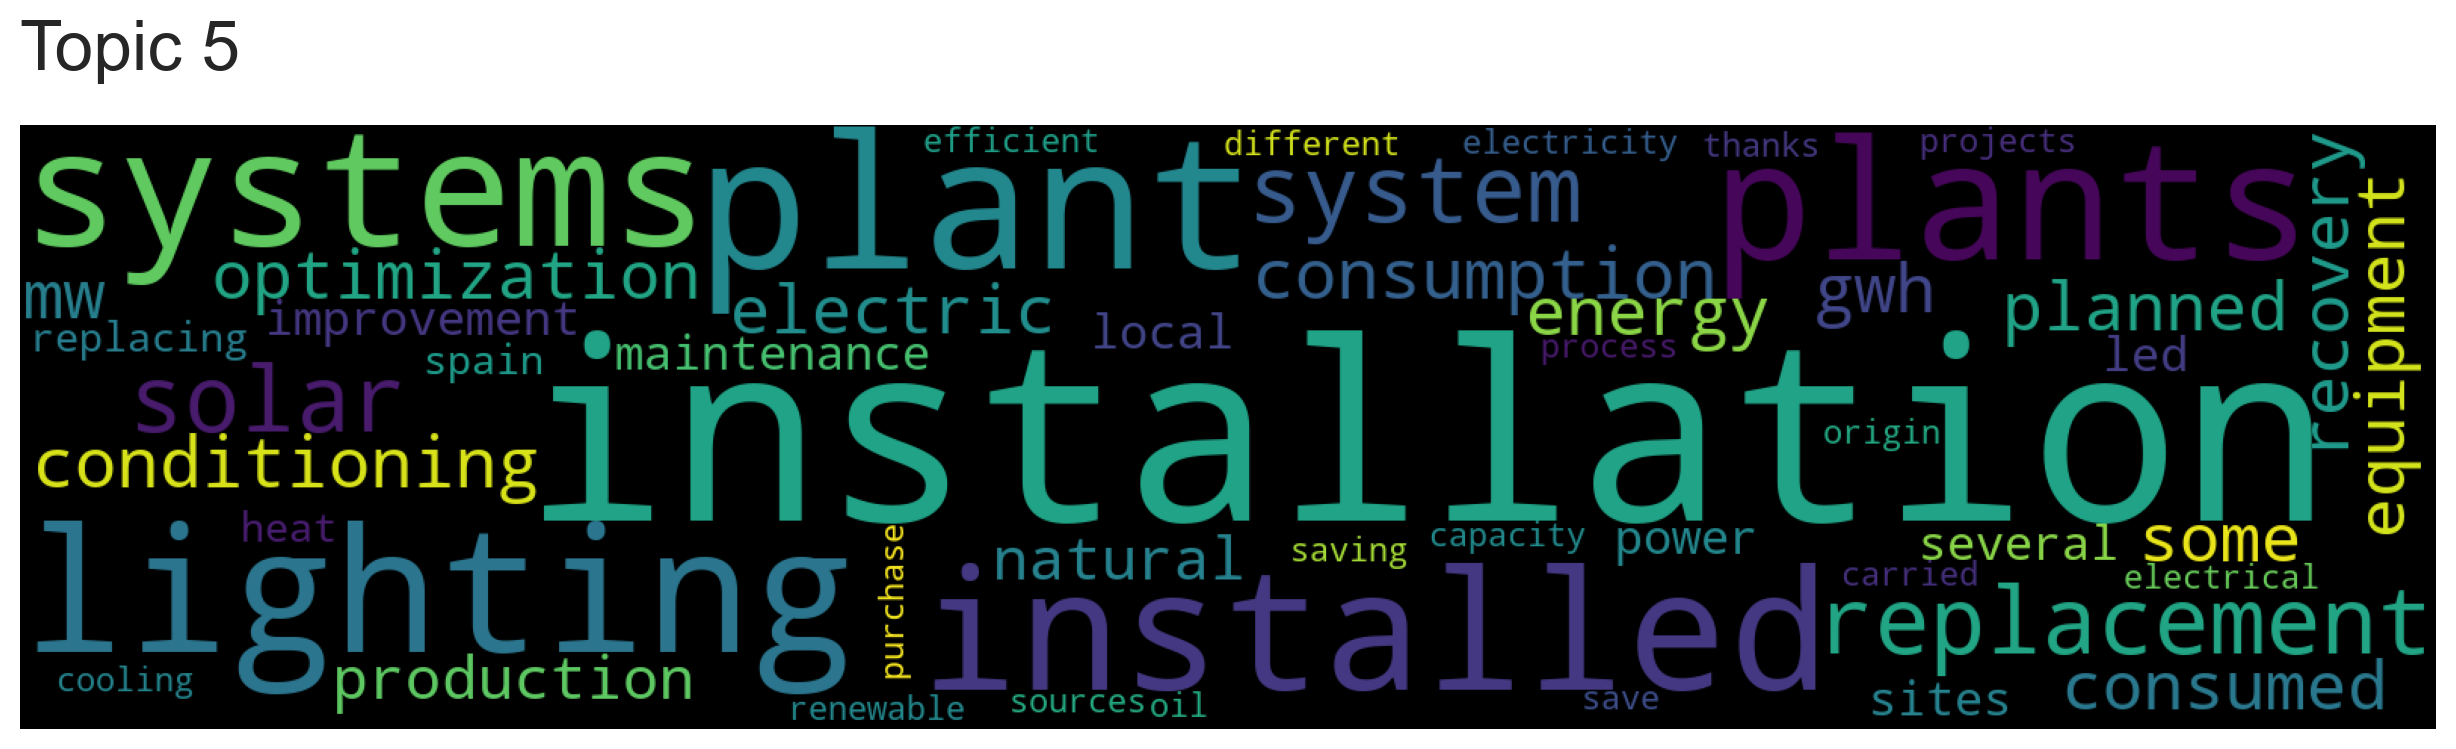

In [566]:
model.generate_topic_wordcloud(topic_num=5)

In [567]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=5, num_docs=15)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print(doc)
    print("-----------")

Document: 4133, Score: 0.9154545068740845
Installation of a photovoltaic plant 100kWp.
-----------
Document: 6040, Score: 0.8954629898071289
Reduction of 2,066 MWh of electric energy consumption in existing buildings by year (622 TCO2e) carrying out different actions such as cooling systems optimization, installation of high-efficiency equipments, or lighting system replacements  for the manufacturing plants of the Bioscience, Diagnostic and Hospital divisions in Spain and USA.
-----------
Document: 2114, Score: 0.8903613090515137
Reduction of 2066 MWh of electric energy consumption in existing buildings by year (622 tCO2e) carrying out different actions such as cooling systems optimization, installation of high-efficiency equipments, or lighting system replacements  for the manufacturing plants of the Bioscience, Diagnostic and Hospital divisions in Spain and USA.
-----------
Document: 2783, Score: 0.8833487033843994
Optimization of 926 MWh of Natural gas demand in new buildings by ye

In [137]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0,num_docs=716)

In [138]:
document_ids

array([ 454, 3299, 5705, 5699, 2579, 1899, 3257, 6067, 4438,  757, 5630,
       6379, 1970, 2430, 4291,  148, 5298,  807, 1844, 5929,  113,   20,
       6448,   42, 6215, 2133, 1425, 5999, 3915, 1182, 2735, 2935, 1407,
        561, 5932, 1527, 5831, 5000, 5381, 3006, 1929,  510, 3657, 6225,
       3598, 5451, 6422, 1297, 6524, 5174, 6613, 5817, 2041, 3030, 3703,
       3481, 4149, 2934, 3547,  983, 3008, 3973, 5097, 2854, 5549, 1733,
       3177,  780,  251,  612, 1356, 2730,  739, 1741, 5494, 4480, 2862,
       6637,  288,  506, 3431, 3062, 3683,    6, 6231, 4180,  247, 4305,
        876, 5507, 5243, 4542, 1954, 4122, 4159, 6424, 2026, 4823,  505,
       6259, 3109, 3515, 3641, 5331, 2384, 1821, 2074, 1130, 6245, 1470,
       5703, 2693, 5643, 1242, 4179, 5208, 3994, 1749,  138, 4844, 1183,
       3966, 3123, 4775, 4125, 4454, 4562, 5522, 2120, 3486, 6416,  789,
       3719, 3429, 5713, 3016, 2125, 5902, 6383, 3343, 1893, 2145, 1820,
       3146, 6182,   76, 5418, 2600, 5485,  882, 59

In [130]:
topic_sizes, topic_nums = model.get_topic_sizes()

In [135]:
topic_sizes

array([716, 320, 304, 290, 232, 197, 172, 169, 161, 150, 149, 144, 140,
       134, 127, 127, 126, 122, 117, 117, 105,  91,  90,  83,  82,  78,
        77,  76,  76,  72,  71,  69,  64,  63,  59,  59,  58,  56,  51,
        51,  50,  48,  48,  47,  45,  44,  42,  42,  41,  41,  41,  40,
        39,  39,  39,  38,  37,  37,  37,  37,  36,  35,  35,  33,  32,
        31,  31,  29,  29,  29,  28,  28,  23,  18,  18], dtype=int64)

In [139]:
#conver docs to a pandas dataframe
df = pd.DataFrame(docs, columns=['text'])

In [158]:
df

,text
0,A large proportion of emissions in scope 1 is ...
1,Medibank set an absolute target to be certifie...
2,In our strategy we have defined science-based ...
3,Intuit has a target to be carbon neutral every...
4,In the course of the renewal of the company tr...
...,...
6707,Garanti BBVA is a signatory to the SBTi since ...
6708,This target is an annual target set for Airbus...
6709,The total emissions target was set in Japan as...
6710,This target (2013–2036) applies to Scope 1 and...


In [191]:
document_topic_num = model.get_documents_topics(doc_ids=np.arange(0,6712))[0]
document_topic_score = model.get_documents_topics(doc_ids=np.arange(0,6712))[1]

In [192]:
df['topic_num'] = document_topic_num
df['topic_score'] = document_topic_score

,text,topic_num,topic_score
0,A large proportion of emissions in scope 1 is ...,6,0.665347
1,Medibank set an absolute target to be certifie...,8,0.549791
2,In our strategy we have defined science-based ...,30,0.629322
3,Intuit has a target to be carbon neutral every...,8,0.734222
4,In the course of the renewal of the company tr...,6,0.639924
...,...,...,...
6707,Garanti BBVA is a signatory to the SBTi since ...,46,0.563409
6708,This target is an annual target set for Airbus...,15,0.729313
6709,The total emissions target was set in Japan as...,1,0.713584
6710,This target (2013–2036) applies to Scope 1 and...,53,0.829281


Text(0, 0.5, 'Number of Documents')

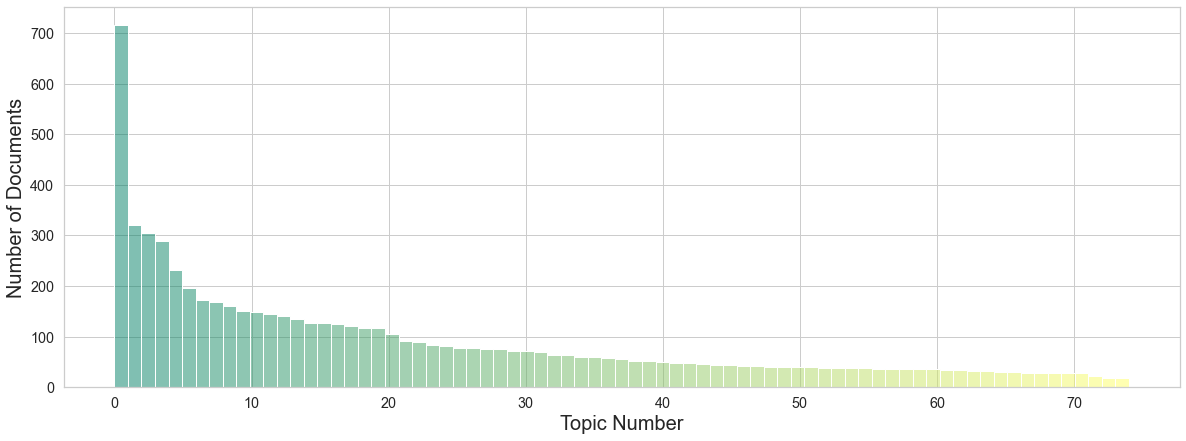

In [672]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid")
ax=sns.histplot(x='topic_num', data=df,bins=75,hue='topic_num',legend=False, palette='summer')
ax.set_xlabel('Topic Number',fontsize=20)
ax.set_ylabel('Number of Documents',fontsize=20)

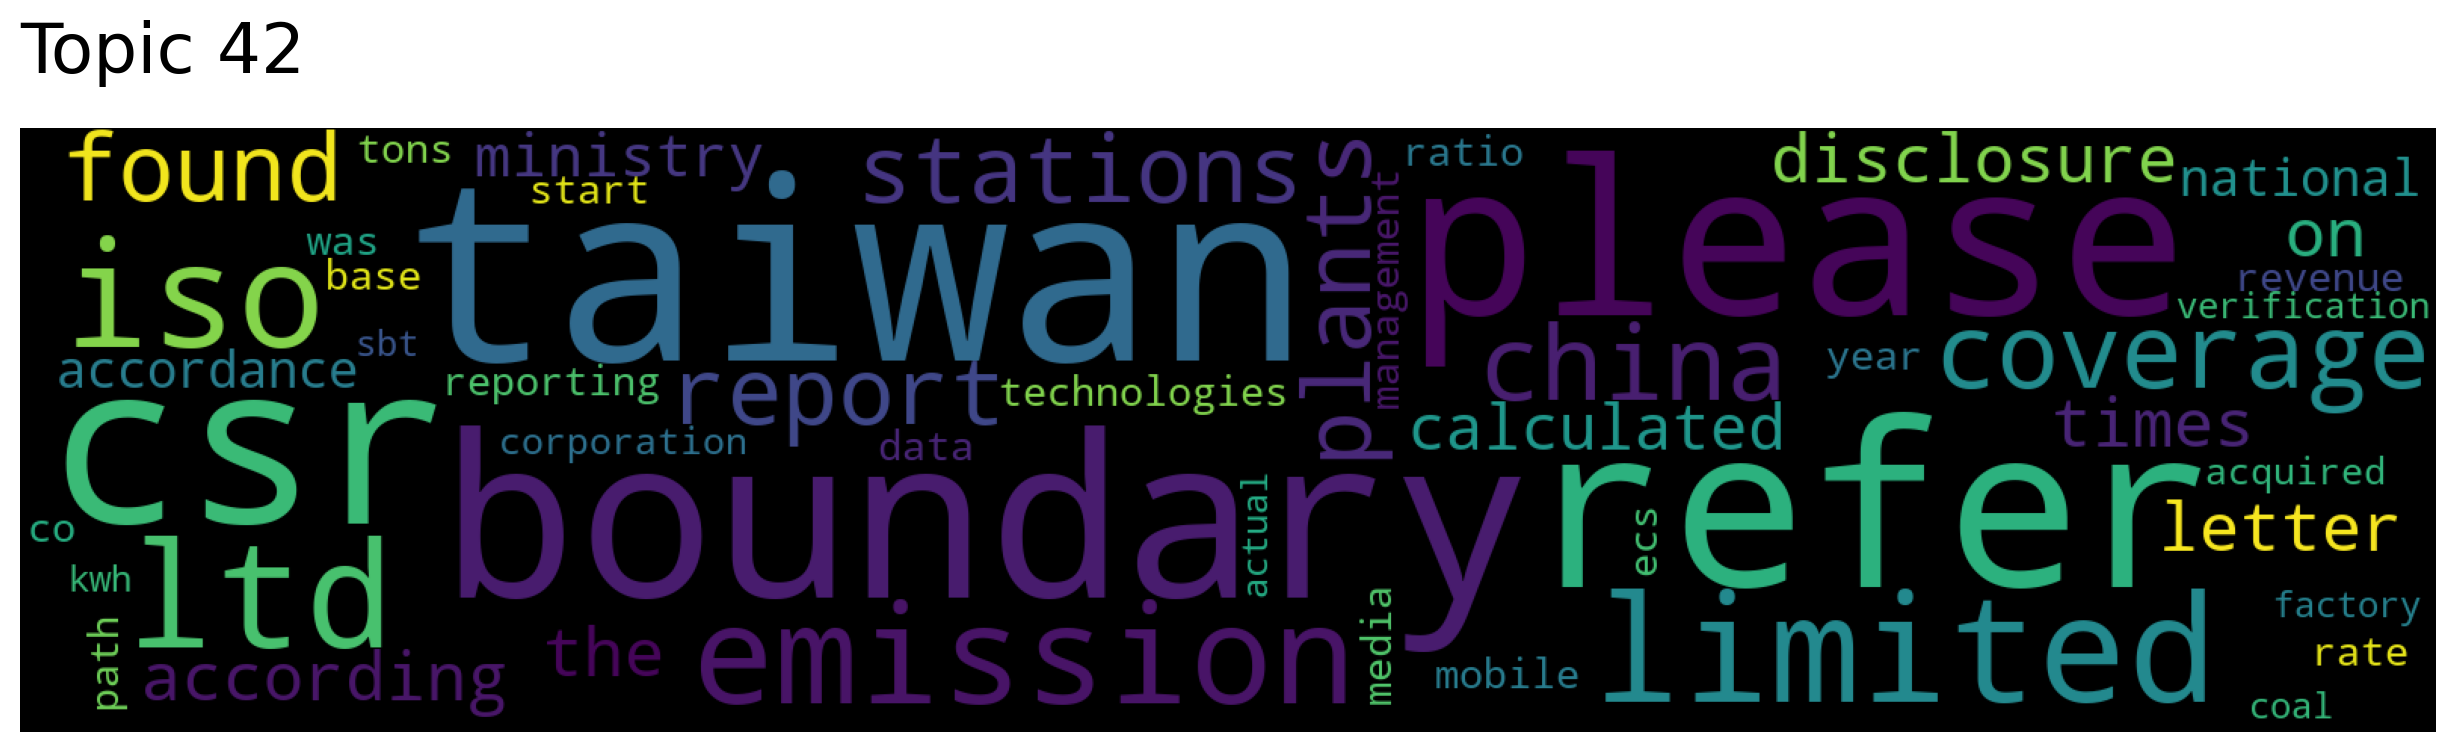

In [214]:
model.generate_topic_wordcloud(topic_num=42)

In [215]:
df[df['topic_num'] == 42].sort_values(by='topic_score', ascending=False).head(20)

,text,topic_num,topic_score
383,NPC has set absolute target which includes all...,42,0.917588
319,NPC has set absolute target which includes all...,42,0.915734
4799,FPC has set absolute target which includes all...,42,0.904255
5185,NPC has set absolute target which includes all...,42,0.898367
72,FPC has set absolute target which includes all...,42,0.898169
6414,FPC has set absolute target which includes all...,42,0.892131
978,The absolute targets established by CHIMEI is ...,42,0.887074
5971,The absolute targets established by CHIMEI is ...,42,0.858755
2939,"In 2019, emissions were reduced by 11,310.25 m...",42,0.815183
3099,The absolute targets established by CHIMEI is ...,42,0.809225


In [614]:
conditions=[
    df['topic_num'].isin([0,32,41,72,66,47]),
    df['topic_num'].isin([1,18,52,24,58,61,68,25]),
    df['topic_num'].isin([2,10,19,69]),
    df['topic_num'].isin([3,8]),
    df['topic_num'].isin([5,17,26,73,43]),
    df['topic_num'].isin([6,39,53]),
    df['topic_num'].isin([7,48,49,51,74]),
    df['topic_num'].isin([11,67]),
    df['topic_num'].isin([12,22,56,54]),
    df['topic_num'].isin([13]),
    df['topic_num'].isin([14]),
    df['topic_num'].isin([15,70]),
    df['topic_num'].isin([16]),
    df['topic_num'].isin([23,55]),
    df['topic_num'].isin([28,20,21,30]),
    df['topic_num'].isin([29]),
    df['topic_num'].isin([34]),
    df['topic_num'].isin([36]),
    df['topic_num'].isin([38,62,31,33]),
    df['topic_num'].isin([40]),
    df['topic_num'].isin([44]),
    df['topic_num'].isin([46]),
    df['topic_num'].isin([50]),
    df['topic_num'].isin([57]),
    df['topic_num'].isin([27,37,35,4,9,42,45,59,60,63,64,65,71])
]

choices=[
    'SBTI (+IPCC) and SDA/ADA',
    'Goals for fiscal years for domestic and overseas locations (Asia)',
    'General Scope-3: Goods/Services, Supply-Chain, Commuting',
    'Net-Zero carbon emissions by 2030-2060',
    'Electricity Efficient Lighting, Air-Conditioning and Refrigerants in Work Plants',
    'Reduce Fuel Consumption (Modern Engines/Electric Vehicles)',
    'General (Unclear)',
    'Replace Coal Plants with Natural Gas, Solar and Wind Powered Systems',
    'CO2 Emission Metrics (Tons/Year)',
    'Discussion of Factories and Plants in Asia',
    'Reduce Scope1+2 Emissions in Office Spaces',
    'Purchase Electricy with Guarantees of Origin and Renewable Certificates',
    'Reduce Stationary Combustion Emissions',
    'Recycling',
    'Renewable Energy (Switch/Invest) in Solar and Wind',
    'INDC',
    'Energy Efficiency in Sold Products',
    '3% Solution, WWF and CDP',
    'General Yearly Goals',
    'Market-Based',
    'Reduce Fugitive Methane from Natural Gas Processes',
    'Gold Standard Certificates and Carbon Credits',
    'Waste/kg Calculations',
    'Reduce Flaring Emissions to Zero by 2025-2030',
    'Others',
]

df['activity'] = np.select(conditions, choices, default='None')

In [615]:
df['activity'].nunique()

25

In [616]:
#rename the column 'activity' to 'group' inplace=True
df.rename(columns={'activity':'group'}, inplace=True)

In [617]:
df.head()

,text,topic_num,topic_score,group
0,A large proportion of emissions in scope 1 is ...,6,0.665347,Reduce Fuel Consumption (Modern Engines/Electr...
1,Medibank set an absolute target to be certifie...,8,0.549791,Net-Zero carbon emissions by 2030-2060
2,In our strategy we have defined science-based ...,30,0.629322,Renewable Energy (Switch/Invest) in Solar and ...
3,Intuit has a target to be carbon neutral every...,8,0.734222,Net-Zero carbon emissions by 2030-2060
4,In the course of the renewal of the company tr...,6,0.639924,Reduce Fuel Consumption (Modern Engines/Electr...


In [618]:
sns.set_style("whitegrid")

Text(0, 0.5, 'Group')

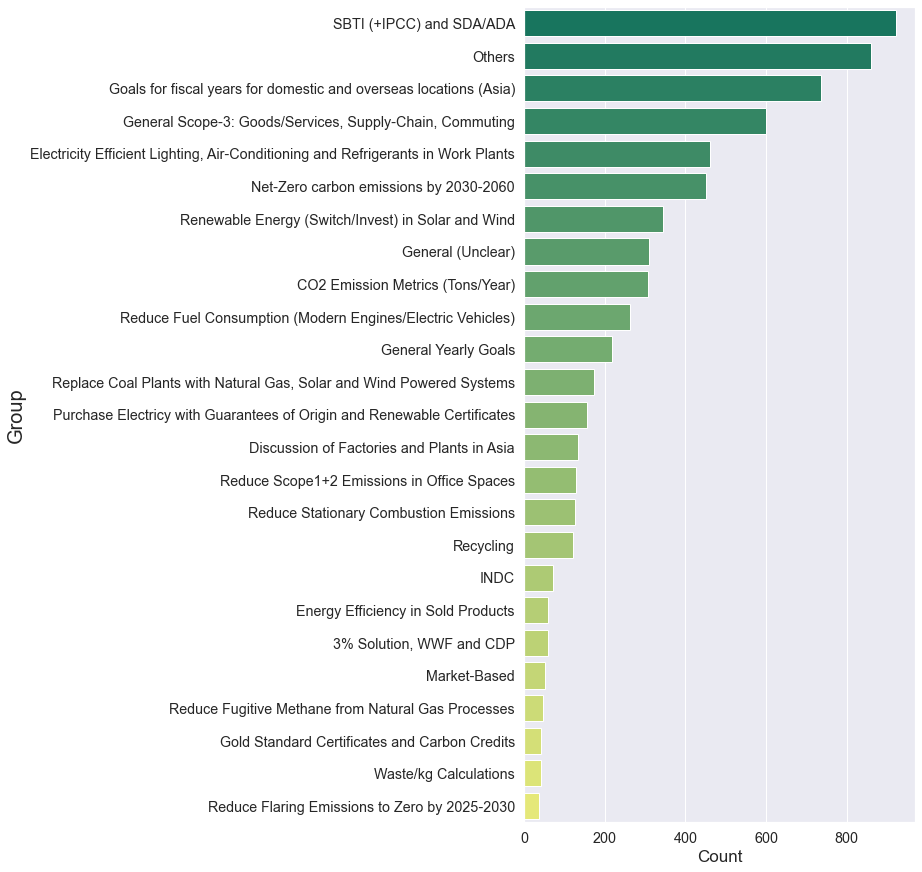

In [619]:
plt.figure(figsize=(7,15))
sns.set(font_scale=1.3)
ax=sns.countplot(y='group', data=df, order=df.groupby('group').count()['topic_num'].sort_values(ascending=False).index,palette='summer')
ax.set_xlabel('Count', fontsize=17)
ax.set_ylabel('Group',fontsize=20)

Text(0, 0.5, 'Count')

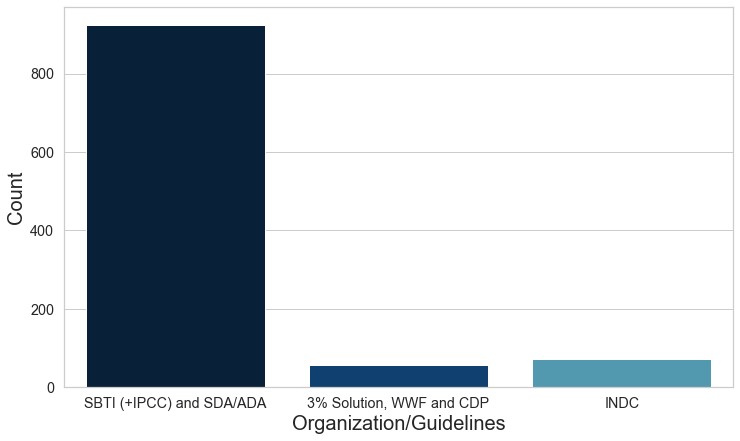

In [681]:
primary_guidelines_df = df[(df['group']=='SBTI (+IPCC) and SDA/ADA')|(df['group']=='INDC')|(df['group']=='3% Solution, WWF and CDP')]
plt.figure(figsize=(12,7))
ax=sns.countplot(x='group', data=primary_guidelines_df, palette='ocean')
ax.set_xlabel('Organization/Guidelines',fontsize=20)
ax.set_ylabel('Count',fontsize=20)

In [637]:
activities_df = df[
    (df['group']=='Reduce Fuel Consumption (Modern Engines/Electric Vehicles)')|
    (df['group']=='Renewable Energy (Switch/Invest) in Solar and Wind')|
    (df['group']=='General Scope-3: Goods/Services, Supply-Chain, Commuting')|
    (df['group']=='Purchase Electricy with Guarantees of Origin and Renewable Certificates')|
    (df['group']=='Replace Coal Plants with Natural Gas, Solar and Wind Powered Systems')|
    (df['group']=='Electricity Efficient Lighting, Air-Conditioning and Refrigerants in Work Plants')|
    (df['group']=='Recycling')|
    (df['group']=='Gold Standard Certificates and Carbon Credits')|
    (df['group']=='Energy Efficiency in Sold Products')|
    (df['group']=='Reduce Stationary Combustion Emissions')|
    (df['group']=='Market-Based')|
    (df['group']=='Reduce Fugitive Methane from Natural Gas Processes')|
    (df['group']=='Reduce Flaring Emissions to Zero by 2025-2030')
]

Text(0, 0.5, 'Activity')

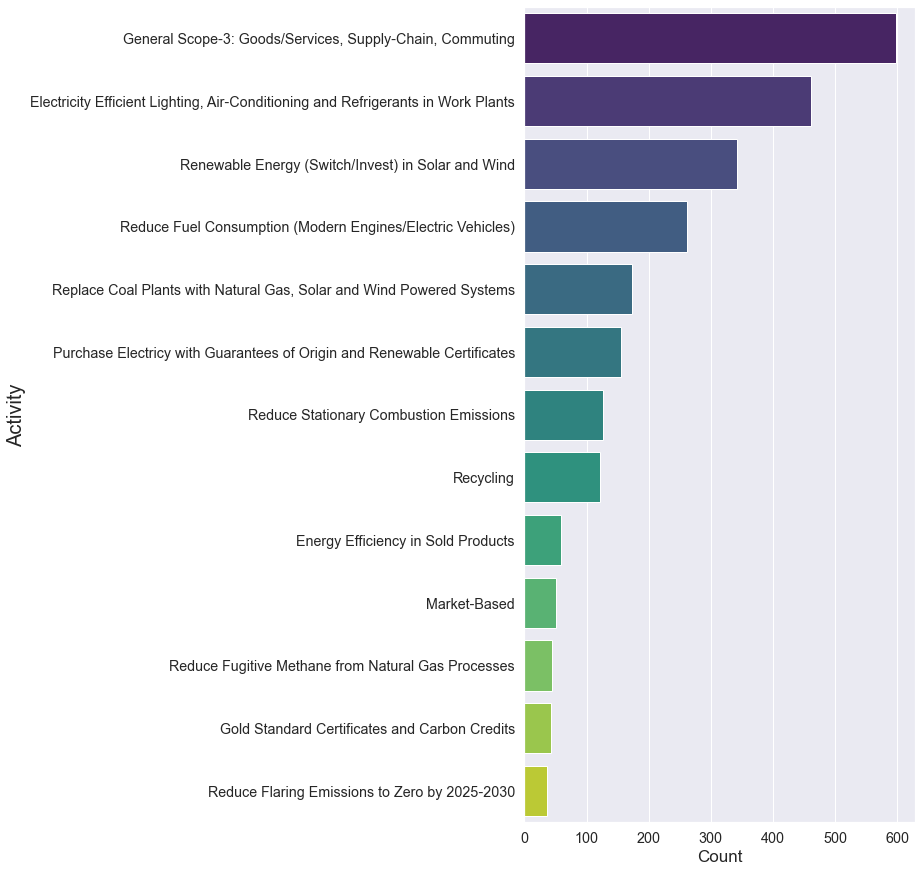

In [647]:
plt.figure(figsize=(7,15))
sns.set(font_scale=1.3)
ax=sns.countplot(y='group', data=activities_df, order=activities_df.groupby('group').count()['topic_num'].sort_values(ascending=False).index,palette='viridis')
ax.set_xlabel('Count', fontsize=17)
ax.set_ylabel('Activity',fontsize=20)

In [655]:
activities_df.groupby('group').count()['topic_num'].sort_values(ascending=False)

group
General Scope-3: Goods/Services, Supply-Chain, Commuting                            599
Electricity Efficient Lighting, Air-Conditioning and Refrigerants in Work Plants    461
Renewable Energy (Switch/Invest) in Solar and Wind                                  343
Reduce Fuel Consumption (Modern Engines/Electric Vehicles)                          262
Replace Coal Plants with Natural Gas, Solar and Wind Powered Systems                173
Purchase Electricy with Guarantees of Origin and Renewable Certificates             155
Reduce Stationary Combustion Emissions                                              126
Recycling                                                                           121
Energy Efficiency in Sold Products                                                   59
Market-Based                                                                         50
Reduce Fugitive Methane from Natural Gas Processes                                   45
Gold Standard Certificates

In [634]:
def detect_method_sbti(text):
    if 'decarbonization' in text.lower():
        return 'SDA/ADA'
    elif 'sda' in text.lower():
        return 'SDA/ADA'
    else:
        return 'N/A'

In [662]:
sbti_df = df[df['group']=='SBTI (+IPCC) and SDA/ADA']
sbti_df['method'] = sbti_df['text'].apply(detect_method_sbti)
sda_df = sbti_df[sbti_df['method']=='SDA/ADA']
complete_activities = activities_df.append(sda_df)

C:\Users\CreepyRainbow\AppData\Local\Temp/ipykernel_23152/1816629545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbti_df['method'] = sbti_df['text'].apply(detect_method_sbti)


In [666]:
complete_activities.drop('method',axis=1,inplace=True)

Text(0, 0.5, 'Activity')

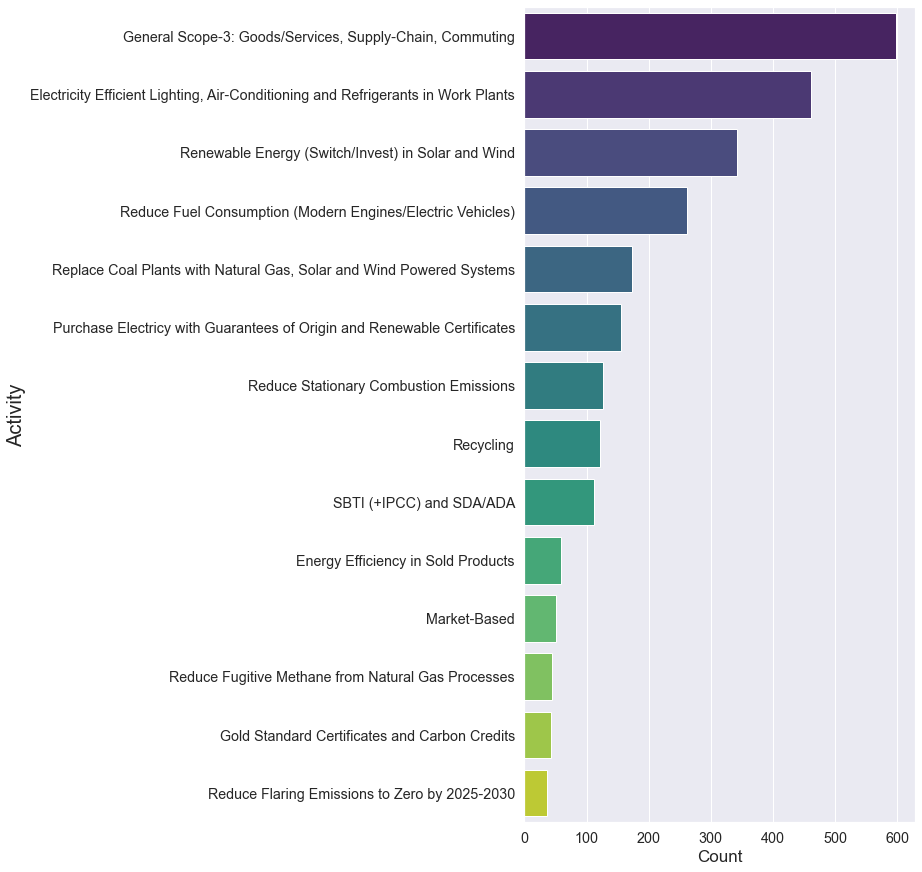

In [663]:
plt.figure(figsize=(7,15))
sns.set(font_scale=1.3)
ax=sns.countplot(y='group', data=complete_activities, order=complete_activities.groupby('group').count()['topic_num'].sort_values(ascending=False).index,palette='viridis')
ax.set_xlabel('Count', fontsize=17)
ax.set_ylabel('Activity',fontsize=20)